In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import colormaps

sys.path.append("../XRaySimulation")

from XRaySimulation import Pulse, DeviceSimu, util, Crystal

plt.rcParams.update({'font.size': 14})

# Experiment parameters
X-ray energy: 9.83 keV
Diamond grating groove depth: 4 um
Diamond grating substrate: 30um - 4um = 26 um

Gold grating groove depth: 1.9 um
Gold grating substrate: 250 nm SiN

Silicon grating groove depth: 8 um
Silicon grating substrate: 25um - 8um = 17 um

In [20]:
# Get the incident wave-vector
E_c = 9.83
waveveclength = util.kev_to_wavevec_length(energy=E_c)


def getGratings(tilt_angle):
    # Create each grating object
    diaGrat = Crystal.RectangleGrating(a=0.25,
                                       b=0.25,
                                       n=1. - 0.75618 * 1e-5 + 1.j * 0.66109 * 1e-8,
                                       height=4 / np.cos(tilt_angle),
                                       base_thickness=26. / np.cos(tilt_angle))

    siliGrat = Crystal.RectangleGrating(a=0.25,
                                        b=0.25,
                                        n=1. - 0.50532 * 1e-5 + 1.j * 0.79565 * 1e-7,
                                        height=8 / np.cos(tilt_angle),
                                        base_thickness=17. / np.cos(tilt_angle))

    goldGrat = Crystal.RectangleGrating(a=0.25,
                                        b=0.25,
                                        n=1. - 0.30686 * 1e-4 + 1.j * 0.20657 * 1e-5,
                                        height=1.9 / np.cos(tilt_angle),
                                        base_thickness=1e-6 / np.cos(tilt_angle))

    SiNsubstrate = Crystal.RectangleGrating(a=10000,
                                            b=10000,
                                            n=1. - 0.50532 * 1e-5 + 1.j * 0.79565 * 1e-7,
                                            # I cannot find the value for SiN. Therefore, I use the value from Si 
                                            height=1e-6 / np.cos(tilt_angle),
                                            base_thickness=0.25 / np.cos(tilt_angle))

    return diaGrat, siliGrat, goldGrat, SiNsubstrate


# Loop through the angles
angle_list = np.linspace(start=-np.deg2rad(10), stop=np.deg2rad(70), num=100)
diamondEfficiencies_1st = np.zeros_like(angle_list)
siliconEfficiencies_1st = np.zeros_like(angle_list)
goldEfficiencies_1st = np.zeros_like(angle_list)

diamondEfficiencies_0th = np.zeros_like(angle_list)
siliconEfficiencies_0th = np.zeros_like(angle_list)
goldEfficiencies_0th = np.zeros_like(angle_list)

for angle_idx in range(angle_list.shape[0]):
    angle = angle_list[angle_idx]
    wavevec = np.array([0, 0, 1.]) * waveveclength
    myDiamondGrating, mySiliconGrating, myGoldGrating, mySiNsubstrate = getGratings(tilt_angle=angle)

    # Get efficiency from diamond grating
    diamondEfficiencies_0th[angle_idx] = np.abs(myDiamondGrating.get_grating_coefficient(kin=wavevec, order=0)) ** 2
    diamondEfficiencies_1st[angle_idx] = np.abs(myDiamondGrating.get_grating_coefficient(kin=wavevec, order=1)) ** 2

    # Get efficiency from diamond grating
    siliconEfficiencies_0th[angle_idx] = np.abs(mySiliconGrating.get_grating_coefficient(kin=wavevec, order=0)) ** 2
    siliconEfficiencies_1st[angle_idx] = np.abs(mySiliconGrating.get_grating_coefficient(kin=wavevec, order=1)) ** 2

    # Get efficiency from diamond grating
    tmp = np.abs(mySiNsubstrate.get_grating_coefficient(kin=wavevec, order=0)) ** 2
    goldEfficiencies_0th[angle_idx] = (np.abs(myGoldGrating.get_grating_coefficient(kin=wavevec, order=0)) ** 2) * tmp
    goldEfficiencies_1st[angle_idx] = (np.abs(myGoldGrating.get_grating_coefficient(kin=wavevec, order=1)) ** 2) * tmp
    #print(tmp)

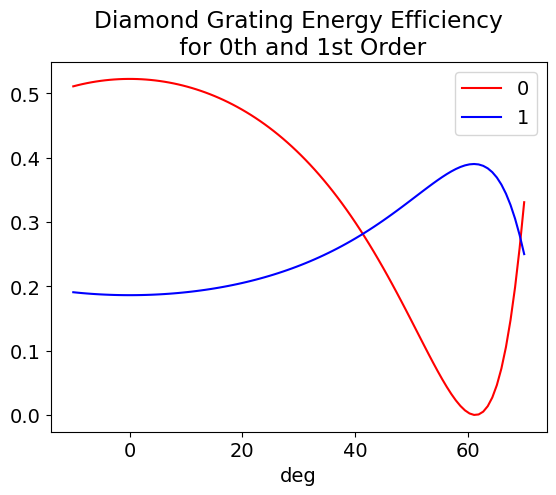

In [21]:
plt.plot(np.rad2deg(angle_list), diamondEfficiencies_0th, label='0', c='r')
plt.plot(np.rad2deg(angle_list), diamondEfficiencies_1st, label='1', c='b')
plt.legend()
plt.xlabel("deg")
plt.title("Diamond Grating Energy Efficiency\n for 0th and 1st Order")
plt.show()

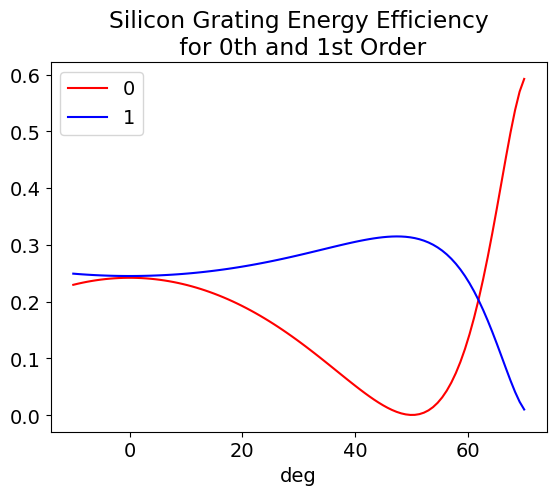

In [22]:
plt.plot(np.rad2deg(angle_list), siliconEfficiencies_0th, label='0', c='r')
plt.plot(np.rad2deg(angle_list), siliconEfficiencies_1st, label='1', c='b')
plt.legend()
plt.xlabel("deg")
plt.title("Silicon Grating Energy Efficiency\n for 0th and 1st Order")
plt.show()

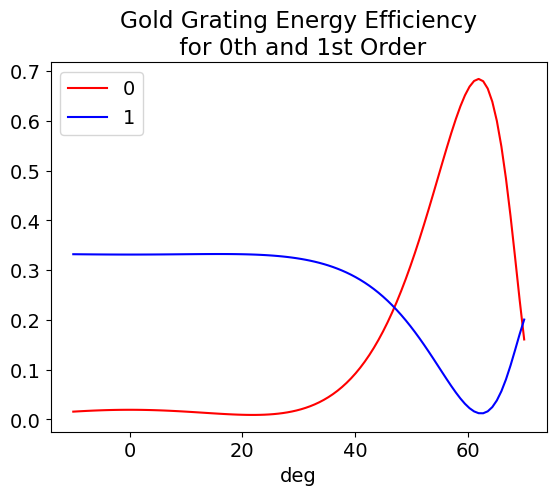

In [23]:
plt.show()
plt.plot(np.rad2deg(angle_list), goldEfficiencies_0th, label='0', c='r')
plt.plot(np.rad2deg(angle_list), goldEfficiencies_1st, label='1', c='b')
plt.legend()
plt.xlabel("deg")
plt.title("Gold Grating Energy Efficiency\n for 0th and 1st Order")
plt.show()

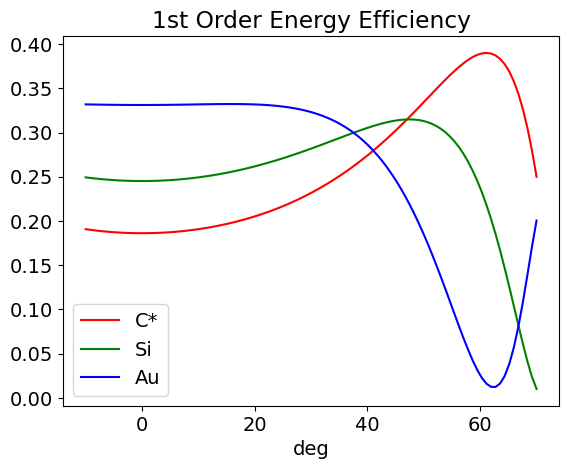

In [24]:
plt.show()
plt.plot(np.rad2deg(angle_list), diamondEfficiencies_1st, label='C*', c='r')
plt.plot(np.rad2deg(angle_list), siliconEfficiencies_1st, label='Si', c='g')
plt.plot(np.rad2deg(angle_list), goldEfficiencies_1st, label='Au', c='b')
plt.legend()
plt.xlabel("deg")
plt.title("1st Order Energy Efficiency")
plt.show()